# Analyza liekov podla skupiny ATC1 
## Otazky:
* Ktore skupiny liekov sa najviac spotrebuvaju ?
* Ako sa meni spotreba podla jednotlivych kategorii ?
* Ako to suvisi s pandemiou ?

In [35]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go

from sklearn.linear_model import LinearRegression

%run tables.py

In [36]:
modra = '#4B6AAB'
zelena = '#73B5AB'
zlta = '#F1C75B'
oranzova = '#D8764C'
ruzova = '#B75B9E'

In [37]:
# Creating: detailed_table[year] 

detailed_tables = {}
for year in range(2015,2020):
    detailed_tables[year] = import_table('detailed',year).groupby('ATC1_popis').sum().sort_values(by='Počet balení',ascending=False)
    del detailed_tables[year]['ROK SPRAC']
    detailed_tables[year]['CENA'] =  detailed_tables[year]['Úhrada_SPOLU'] / detailed_tables[year]['Počet balení']
display(2019)
display(detailed_tables[2019].head())

2019

,Počet balení,Úhrada_ZP,Úhrada_PAC,Úhrada_SPOLU,CENA
ATC1_popis,,,,,
Kardiovaskulárny systém,3.009478e+07,1.366732e+08,73614509.50,2.102878e+08,6.987516
Nervový systém,2.528963e+07,1.029034e+08,58926530.22,1.618300e+08,6.399066
Tráviaci trakt a metabolizmus,2.003817e+07,1.562717e+08,76696058.77,2.329677e+08,11.626196
Respiračný systém,1.780014e+07,5.968704e+07,73856187.61,1.335432e+08,7.502369
Krv a krvotvorné orgány,1.367591e+07,2.253825e+08,13245441.18,2.386280e+08,17.448775


In [38]:
# Creating: detailed_table[2020] 

temp = import_table('detailed',2020) 
detailed_tables[2020] = temp['Q1'].groupby('ATC1_popis').sum().sort_index()
#display(temp['Q1'].groupby('ATC1_popis').sum().sort_index().shape)
for i in range(2,5):
    #display(temp[f'Q{i}'].groupby('ATC1_popis').sum().sort_index().shape)
    detailed_tables[2020] =  detailed_tables[2020] + temp[f'Q{i}'].groupby('ATC1_popis').sum().sort_index()
del detailed_tables[2020]['ROK SPRAC']
detailed_tables[2020] = detailed_tables[2020].sort_values(by='Počet balení',ascending=False)
display(detailed_tables[2020].head())

,Počet balení
ATC1_popis,
Kardiovaskulárny systém,3.011677e+07
Nervový systém,2.627109e+07
Tráviaci trakt a metabolizmus,1.932763e+07
Respiračný systém,1.514956e+07
Rôzne,1.243575e+07


In [39]:
temp = {}
temp['ATC1_popis'] = []
for i in detailed_tables[2020].index:
    temp['ATC1_popis'] += [i]
    for j in range(2015,2021):
        if j not in temp:
            temp[j] = []
        if j ==2019 and i == '(prázdne)':
            temp[j] += [detailed_tables[j].loc['(prazdne)','Počet balení']]
        else:
            temp[j] += [detailed_tables[j].loc[i,'Počet balení']]
detailed_tables['all'] =  pd.DataFrame(temp).set_index('ATC1_popis')
detailed_tables['all'] = detailed_tables['all'].rename(index={'Systémové hormonálne prípravky okrem pohlavných hormónov':'Hormonálne prípravky okrem pohlavných'})
display(detailed_tables['all'].head())

,2015,2016,2017,2018,2019,2020
ATC1_popis,,,,,,
Kardiovaskulárny systém,3.187437e+07,3.146644e+07,3.072354e+07,3.032789e+07,3.009478e+07,3.011677e+07
Nervový systém,2.565168e+07,2.565618e+07,2.507354e+07,2.561874e+07,2.528963e+07,2.627109e+07
Tráviaci trakt a metabolizmus,1.918639e+07,1.965176e+07,1.968389e+07,1.992195e+07,2.003817e+07,1.932763e+07
Respiračný systém,1.703448e+07,1.678311e+07,1.720150e+07,1.771564e+07,1.780014e+07,1.514956e+07
Rôzne,1.409553e+07,1.374374e+07,1.303431e+07,1.280559e+07,1.165731e+07,1.243575e+07


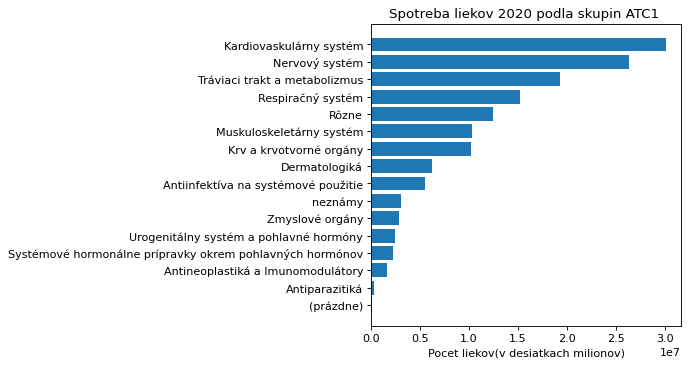

In [40]:
#detailed_tables[2020]= detailed_tables[2020].drop('(prázdne)')

plt.figure(figsize=(5, 5), dpi=80)
plt.barh(y=detailed_tables[2020].sort_values(by='Počet balení',ascending=True).index,
width=detailed_tables[2020].sort_values(by='Počet balení',ascending=True)['Počet balení'])
plt.xlabel('Pocet liekov(v desiatkach milionov)')
plt.title('Spotreba liekov 2020 podla skupin ATC1 ')
plt.show()

In [41]:
display(detailed_tables[2020].sort_values(by='Počet balení',ascending=True).index)

Index(['(prázdne)', 'Antiparazitiká', 'Antineoplastiká a Imunomodulátory',
       'Systémové hormonálne prípravky okrem pohlavných hormónov',
       'Urogenitálny systém a pohlavné hormóny', 'Zmyslové orgány', 'neznámy',
       'Antiinfektíva na systémové použitie', 'Dermatologiká',
       'Krv a krvotvorné orgány', 'Muskuloskeletárny systém', 'Rôzne',
       'Respiračný systém', 'Tráviaci trakt a metabolizmus', 'Nervový systém',
       'Kardiovaskulárny systém'],
      dtype='object', name='ATC1_popis')

In [42]:
fig = px.bar(detailed_tables[2020].sort_values(by='Počet balení',ascending=True).reset_index().query('`Počet balení` > 70000'), y=detailed_tables[2020].sort_values(by='Počet balení',ascending=True).query('`Počet balení` > 70000').index, x='Počet balení', orientation='h', text='Počet balení', color_discrete_sequence=[modra])
fig.update_traces(texttemplate='%{text:.2s}', textposition='auto', textfont_size= 3)
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='show')
fig.update_layout(title= 'Spotreba liekov Q1-Q3 2020 podľa skupín ATC1 ', width=1000, height=400)

fig.update_xaxes(title='Počet balení liekov')
fig.update_yaxes(title=' ')
fig.show()

## Pozorovanie
Na grafe je vidiet ze v roku 2020 bolo najviac spotrebovanych liekov v oblastiach:
* Kardiovaskulárny systém
* Nervový systém
* Tráviaci trakt a metabolizmus
* Respiračný systém
* Rôzne
* Muskuloskeletárny systém

Dalej chceme zistit ci rastie alebo klesa spotreba liekov v tych oblastiach

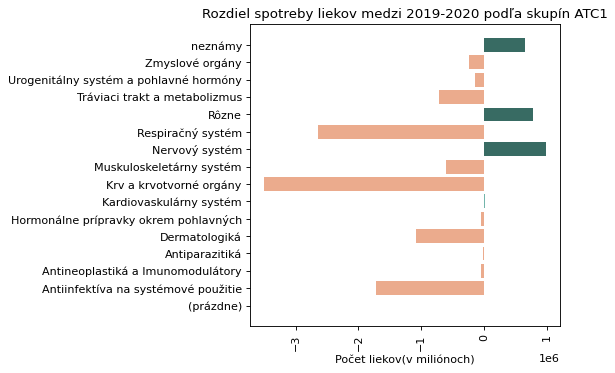

In [47]:
#visualize the difference in the years 2020 and 2019
detailed_tables['all'] = detailed_tables['all'].sort_index()

#remove prazdne 
#temp2019 =  temp2019.drop(index=['neznámy',"(prázdne)"])
#temp2020 =  temp2020.drop(index=['neznámy',"(prázdne)"])

#color = ['#de0404' if diff < 0 else '#128f07' for diff in temp2020['Počet balení'] - temp2019['Počet balení_Q1-Q3']]
color = ['#EBAB8D' if diff < 0 else '#386B63' if diff > 0.5e6 else zelena for diff in detailed_tables['all'][2020] - detailed_tables['all'][2019]]

plt.figure(figsize=(5, 5), dpi=80)
plt.barh(width= detailed_tables['all'][2020] - detailed_tables['all'][2019] , y=detailed_tables['all'].index,color=color)
plt.xticks(rotation=90)
plt.xlabel('Počet liekov(v miliónoch)')
plt.title('Rozdiel spotreby liekov medzi 2019-2020 podľa skupín ATC1')
plt.show()

## Pozorovanie
Z kategorii z ktorych najviac liekov se spotrebovali za rok 2020 zazili narast:
* Nervovy system
* Rozne

Ostatne kategorie bud stagnuju alebo zazivaju znacny pokles, co je pozitivna sprava. To moze byt zapricinene zlepsujucim zivotnym standartom alebo tym ze bola mensia pozornost inym chorobam ako covid-19 pocas pandemie.

* dalej chceme analyzovat narast v kategoriach rozne a nervovy system
    * ci je zmena spojena s pandemiou alebo dlhodobym trendom


## Nervova sustava


In [50]:
def compare_atc2_2020(atc1,year):
    '''
    DESCRIPTION
    return a table where a certain atc1 group will be divided to its atc2 groups, where it will compare the number of used drugs in every atc2 group in     2020 and `year`
    INPUT
    atc1: string - any atc1 group 
    year: int -  2018 or 2019 
    OUTPUT
    pandas dataframe
    '''
    temp = import_table('detailed',2020)
    for i in temp:
        temp[i] = temp[i][['ATC1_popis','ATC2_popis','Počet balení']].query(f"ATC1_popis == '{atc1}'").groupby('ATC2_popis').sum()
    tab_atc2 = temp['Q1'].rename(columns={'Počet balení':2020})
    for i in 'Q2','Q3','Q4':
        tab_atc2[2020] += temp[i]['Počet balení']
    tab_atc2 = tab_atc2.sort_values(by=2020,ascending=False)
    temp = import_table('all',year)
    tab_Q13_atc2 = temp['Q1'].loc[:,['LIEK_popis','Počet balení_Q1']].rename(columns={'Počet balení_Q1':'Počet balení_Q1-Q3'})
    for index in 'Q2','Q3','Q4':
        tab_Q13_atc2['Počet balení_Q1-Q3'] += temp[index][f'Počet balení_{index}']
    temp = import_table('detailed',year)
    temp.drop_duplicates(subset='LIEK_popis',inplace=True)
    temp = temp[['LIEK_popis','ATC2_popis','ATC1_popis']]
    temp = temp.query(f'ATC1_popis == "{atc1}"')
    tab_Q13_atc2 = tab_Q13_atc2.merge(temp,on='LIEK_popis').groupby('ATC2_popis').sum().sort_values(by='Počet balení_Q1-Q3',ascending=False)
    tab_atc2[year] = tab_Q13_atc2['Počet balení_Q1-Q3']
    tab_atc2 = tab_atc2.reset_index()

    return tab_atc2

    

In [51]:
tab_compare_neural_drugs = compare_atc2_2020('Nervový systém',2019)
tab_compare_neural_drugs.iloc[4,0] = 'Ine'
display(tab_compare_neural_drugs)

,ATC2_popis,2020,2019
0,Analgetiká,1.082795e+07,9936842.840
1,Psycholeptiká,8.184276e+06,8010926.812
2,Psychoanaleptiká,4.165420e+06,4140478.192
3,Antiepileptiká,1.475685e+06,1461227.059
4,Ine,7.398389e+05,780990.580
5,Anestetiká,4.456146e+05,485298.703
6,Antiparkinsoniká,4.323069e+05,432602.769


### Poznamky
* Analgetika su na zmiernenie bolesti
* Psycholeptiká su na liecbu schizofrenie a uzkosti
* Psychoanaleptiká su na zvysenie ucinnosti nervovej sustavy ( kofein, kokain ...)
* Antiepileptiká su na liecbu epilepsie
* Anestetiká su na znecitlivenie organizmu
* Antiparkinsoniká su na liecbu parkinsona

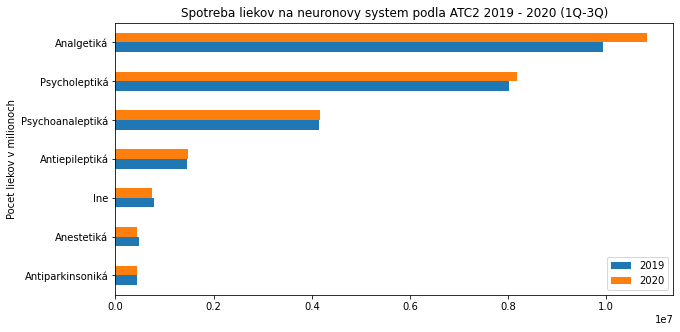

In [52]:
tab_compare_neural_drugs = tab_compare_neural_drugs.sort_values(by=2020)
ax = tab_compare_neural_drugs.plot(x='ATC2_popis', y=[2019,2020], kind='barh',figsize=(10,5))
ax.set_ylabel('Pocet liekov v milionoch')
ax.set_title('Spotreba liekov na neuronovy system podla ATC2 2019 - 2020 (1Q-3Q)')
plt.show()

In [53]:
fig = px.bar(tab_compare_neural_drugs, y="ATC2_popis", x=[2019,2020], barmode="group",orientation='h',title="Percentage of GDP invested in research and development")
fig = go.Figure()
fig.add_trace(go.Bar(x=tab_compare_neural_drugs[2019],
                y=tab_compare_neural_drugs['ATC2_popis'],
                name='2019',
                marker_color=modra, orientation= 'h'
                ))
fig.add_trace(go.Bar(x=tab_compare_neural_drugs[2020],
                y=tab_compare_neural_drugs['ATC2_popis'],
                name='2020',
                marker_color=oranzova, orientation= 'h'
                ))

fig.update_layout(
    title='Spotreba liekov na nervový systém podľa ATC2 2019 - 2020 (1Q - 3Q)',
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.05 # gap between bars of the same location coordinate.
)

fig.show()

## Pozorovanie
Podla tabulky a grafov je zjavne ze za zvysenie spotreby liekov pre neuronovy system mozu hlavne analgetika. Dalej sa pozreme na to ako sa tieto kategorie vyvyjali od roku 2015 do 2019 (2020 nie kvoli neuplnym datam)

In [54]:
def compare_atc2_all(atc1):
    '''
    DESCRIPTION
    Very similar to compare_atc2_2020, only with the difference that we are comparing multiple years from 2015 to 2019 ( 2020 not because of incomplete     data)
    INPUT
    atc1: str - any atc1 group
    OUTPUT:
    pandas dataframe
    '''
    for year in range(2015,2020):
        temp = import_table('detailed',year)
        temp = temp.query(f"ATC1_popis == '{atc1}'")
        temp = temp[['ATC2_popis','Počet balení']]
        if year == 2015:
            neural_drugs = temp.groupby('ATC2_popis').sum().rename(columns={'Počet balení':2015}).sort_index()
        else:
            neural_drugs[year] = temp.groupby('ATC2_popis').sum()['Počet balení'].sort_index()
    neural_drugs = neural_drugs.sort_values(by=2019,ascending=False).reset_index()

    return neural_drugs

In [55]:
neural_drugs = compare_atc2_all('Nervový systém')
neural_drugs.iloc[4,0] = 'Ine'
display(neural_drugs)

,ATC2_popis,2015,2016,2017,2018,2019
0,Analgetiká,1.085115e+07,1.064193e+07,1.036591e+07,1.040837e+07,9950472.697
1,Psycholeptiká,7.718598e+06,7.754001e+06,7.468977e+06,7.739591e+06,8016420.272
2,Psychoanaleptiká,3.786101e+06,3.846344e+06,3.859802e+06,4.019187e+06,4148844.542
3,Antiepileptiká,1.552458e+06,1.653421e+06,1.634450e+06,1.642543e+06,1467449.179
4,Ine,7.514569e+05,7.736741e+05,7.717053e+05,7.913905e+05,785336.726
5,Anestetiká,5.582256e+05,5.453249e+05,5.424734e+05,5.917541e+05,487995.703
6,Antiparkinsoniká,4.336952e+05,4.414777e+05,4.302279e+05,4.259033e+05,433107.009


In [56]:
def atc2_scatter(table,rows,cols,regression=True):
    '''
    DESCRIPTION
    Draws multiple scatter plots based on values rows and cols, if regresion is True than it also draws a linear regression line
    INPUT
    table:pd.DataFrame - table with the information to plot, it should look similiar like the output of compare_atc2_all
    rows:int - number of plot rows
    cols:int - number of plot columns
    regression:bool - if True it also plots a linear regression line
    '''
    if regression:
        regr = LinearRegression()
    fig, ax = plt.subplots(rows,cols,figsize=(10,10))
    fig.subplots_adjust(hspace =0.5)
    for i in range(rows):
        for j in range(cols): 
            ax[i,j].set_title(table.iloc[i*2 + j,0])
            ax[i,j].scatter(range(2015,2020),table.iloc[i*2 + j,1:], color=modra)
            if regression:   
                regr.fit(np.array(range(2015,2020)).reshape(-1,1),table.iloc[i*2 + j,1:])
                y_pred = regr.predict(np.array(range(2015,2020)).reshape(-1,1))
                ax[i,j].plot(range(2015,2020),y_pred,color=['red' if x < 0 else 'green' for x in regr.coef_][0])
            

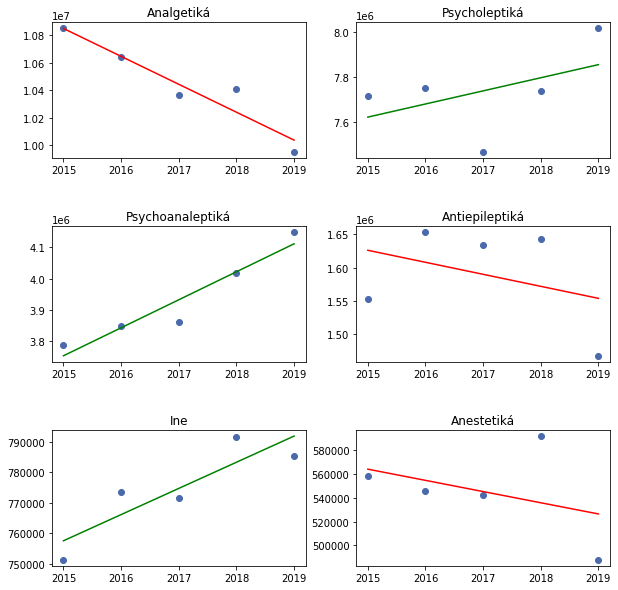

In [57]:
atc2_scatter(neural_drugs,3,2)

## Pozorovanie
* Na zaklade dat vieme usudit ze zvysenie spotreby analgetik moze suvisiet s pandemiou kedze medzi rokmi 2015 - 2019 zazivala tato kategoria pokles a dalsi rok priniesol analgetikam najvyssi narast s pomedzi liekov na nervovu sustavu ( ktore mali aj navyssi narast celkovo takze pravdepodobne analgetika najviac narastli aj s pomedzi ATC2 - treba ale overit).
    * Kedze horucka sa lieci s analgetikami co je jeden s priznakov Covidu 19, tak to moze vysvetlovat narast tychto liekov pocas roku pandemie
* Psycholeptika a psychoanaleptika maju stupajuci trend od roku 2015, takze ich narast je dlhodoby trend

# Rozne

Velmi podobnu analyzu spravime aj pre atc2 skupinu rozne

In [58]:
tab_compare_various = compare_atc2_2020('Rôzne',2019)
tab_compare_various.iloc[4,0] = 'Ine'
tab_compare_various['diff'] = tab_compare_various[2020] - tab_compare_various[2019] 
tab_compare_various['diff%'] = tab_compare_various['diff'] / tab_compare_various[2019] * 100
display(tab_compare_various)

,ATC2_popis,2020,2019,diff,diff%
0,Diagnostické rádiofarmaká,1.074766e+07,9677340.170,1070316.290,11.060025
1,Ostatné liečivá,9.693039e+05,1153538.473,-184234.526,-15.971251
2,Fytofarmaká,1.929352e+05,205297.603,-12362.423,-6.021708
3,Ostatné pomocné a podporné prípravky,1.724558e+05,226242.126,-53786.342,-23.773796
4,Ine,1.318253e+05,142527.780,-10702.509,-7.509069
5,Alergény,9.676844e+04,91689.145,5079.299,5.539695
6,Nutričné prípravky,8.558445e+04,86666.100,-1081.650,-1.248066
7,Diagnostiká,2.487614e+04,30039.140,-5162.995,-17.187559
8,Homeopatiká,1.329133e+04,15906.310,-2614.980,-16.439891
9,Iné rádiofarmaká,1.056000e+03,858.300,197.700,23.033904


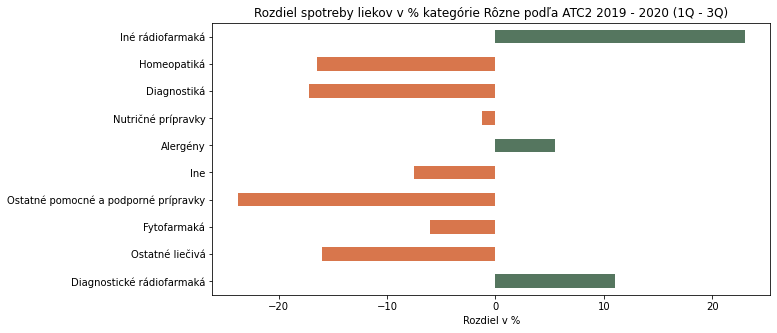

In [59]:
#color = ['#de0404' if diff < 0 else '#128f07' for diff in tab_compare_various['diff%']]
#color = ['#E18167' if diff < 0 else '#55765F' for diff in tab_compare_various['diff%']]
color = [oranzova if diff < 0 else '#55765F' for diff in tab_compare_various['diff%']]
ax = tab_compare_various.plot(x='ATC2_popis',y='diff%', kind='barh',figsize=(10,5),color=color,legend=False)
ax.set_xlabel('Rozdiel v %')
ax.set_title('Rozdiel spotreby liekov v % kategórie Rôzne podľa ATC2 2019 - 2020 (1Q - 3Q)')
ax.set_ylabel(None)
plt.show()

## Poznamky
* kedze pocty spotrebovanych liekov su male tak sa chcem pozriet na relativny rozdiel aby sa lepsie videli co sa deje
## Pozorovanie
* Zvysili sa diagnosticke a ine farmaka a alergeny. ine farmaka maju taku nizku spotrebu ze nam to ziadnu informaciu ale nedava
* Znizenie skumat budeme len keby nevieme co dalej, kedze znizenie aj ocakavame
* Potrebujeme zistit ci s tym mohla mat nieco pandemia pomocou skumania dlhodobeho trendu


In [60]:
various_drugs = compare_atc2_all('Rôzne')
various_drugs.iloc[4,0] = 'Ine'
display(various_drugs)

,ATC2_popis,2015,2016,2017,2018,2019
0,Diagnostické rádiofarmaká,1.080102e+07,1.074993e+07,1.019498e+07,9821441.790,9677427.170
1,Ostatné liečivá,1.688650e+06,1.461740e+06,1.387799e+06,1353895.239,1154863.933
2,Ostatné pomocné a podporné prípravky,9.397216e+05,9.513272e+05,8.710806e+05,1029531.871,247791.691
3,Fytofarmaká,3.070963e+05,2.479197e+05,2.352896e+05,233679.340,205331.603
4,Ine,1.343818e+05,1.341476e+05,1.379744e+05,149638.680,144357.470
5,Alergény,8.810770e+04,5.247433e+04,7.603646e+04,85742.119,93505.175
6,Nutričné prípravky,9.567727e+04,9.792665e+04,8.666465e+04,84223.880,86675.100
7,Diagnostiká,9.853840e+03,2.180599e+04,2.246213e+04,25668.950,30077.110
8,Homeopatiká,3.000553e+04,2.527256e+04,2.098971e+04,20752.180,16395.310
9,Iné rádiofarmaká,1.016650e+03,1.200500e+03,1.024450e+03,1012.200,882.300


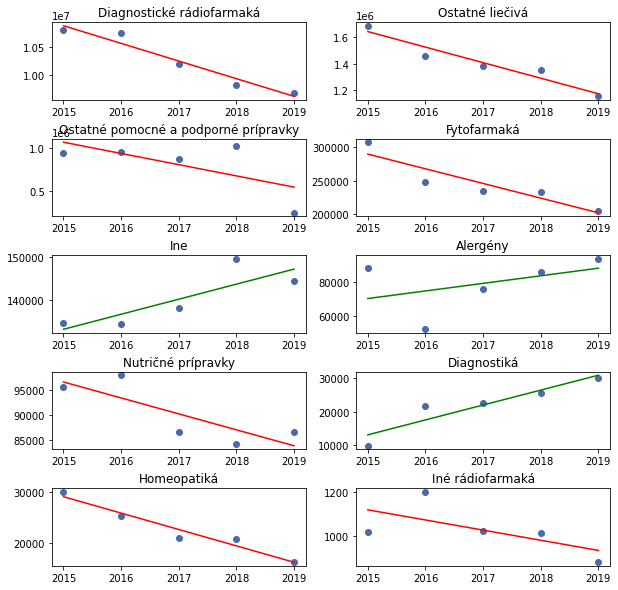

In [61]:
w,h = 2,5
atc2_scatter(various_drugs,5,2)

## Pozorovanie
* skupiny atc2 ktore v 2020 isli proti svojmu trendu medzi rokmi 2015-2019:
    * Diagnostika ( znizili sa )
    * Diagnosticke radiofarmaka ( zvysili sa)
    * Ine ( znizili sa)
* Kedze alergeny pokracuju svoj trend, mozme povedat ze zvysenie sa deje nezavisle od pandemie
* Diagnosticke radiofarmaka zmenili svoje spravanie, treba overit ci existuje dovod preco by skrz Covidu-19 sa zvysila ich spotreba alebo ci nezavisle od pandemie sa deje tento jav